In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Maluku.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  323 non-null    datetime64[ns]
 1   Tn       321 non-null    float64       
 2   Tx       322 non-null    float64       
 3   Tavg     316 non-null    float64       
 4   RH_avg   316 non-null    float64       
 5   RR       321 non-null    float64       
 6   ss       322 non-null    float64       
 7   ff_x     323 non-null    int64         
 8   ddd_x    322 non-null    float64       
 9   ff_avg   323 non-null    int64         
 10  ddd_car  323 non-null    object        
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 27.9+ KB


C:\Users\rivan\AppData\Local\Temp\ipykernel_15512\3994983661.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,24.3,33.6,2.5,28.8
1,2023-02-01,24.7,34.1,0.0,28.7
2,2023-03-01,24.7,31.9,0.0,27.9
3,2023-04-01,25.4,32.6,0.0,28.4
4,2023-05-01,24.3,32.1,1.4,27.8
...,...,...,...,...,...
318,2023-12-16,24.7,32.0,5.4,27.6
319,2023-12-17,24.9,32.2,3.4,28.8
320,2023-12-18,25.5,32.5,0.0,29.0
321,2023-12-19,25.3,32.4,0.0,27.8


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

0

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,24.3,33.6,2.5,28.8
1,31,31,2023-01-02,24.5,32.3,0.4,27.3
2,59,59,2023-01-03,24.5,33.9,19.0,28.6
3,90,90,2023-01-04,23.9,31.2,0.2,26.0
4,120,120,2023-01-05,24.0,31.3,0.0,27.0
...,...,...,...,...,...,...,...
318,318,318,2023-12-16,24.7,32.0,5.4,27.6
319,319,319,2023-12-17,24.9,32.2,3.4,28.8
320,320,320,2023-12-18,25.5,32.5,0.0,29.0
321,321,321,2023-12-19,25.3,32.4,0.0,27.8


In [8]:
#cek null
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         2
Tx         1
RR         2
Tavg       7
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

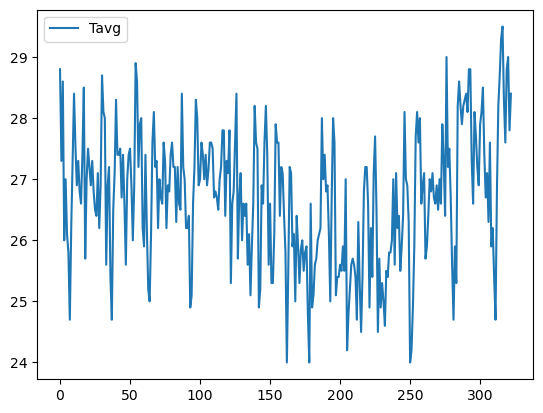

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

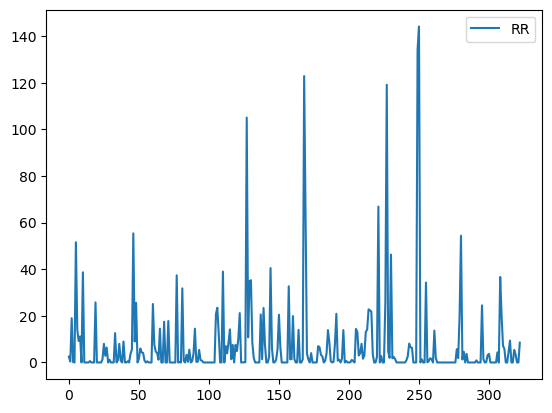

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,24.3,33.6,2.5,28.8,32.3,27.3,0.4
1,31,31,2023-01-02,24.5,32.3,0.4,27.3,33.9,28.6,19.0
2,59,59,2023-01-03,24.5,33.9,19.0,28.6,31.2,26.0,0.2
3,90,90,2023-01-04,23.9,31.2,0.2,26.0,31.3,27.0,0.0
4,120,120,2023-01-05,24.0,31.3,0.0,27.0,28.9,26.1,51.6
...,...,...,...,...,...,...,...,...,...,...
318,318,318,2023-12-16,24.7,32.0,5.4,27.6,32.2,28.8,3.4
319,319,319,2023-12-17,24.9,32.2,3.4,28.8,32.5,29.0,0.0
320,320,320,2023-12-18,25.5,32.5,0.0,29.0,32.4,27.8,0.0
321,321,321,2023-12-19,25.3,32.4,0.0,27.8,32.4,28.4,8.5


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,2.5,28.8,27.3,0.4
1,0.4,27.3,28.6,19.0
2,19.0,28.6,26.0,0.2
3,0.2,26.0,27.0,0.0
4,0.0,27.0,26.1,51.6
...,...,...,...,...
318,5.4,27.6,28.8,3.4
319,3.4,28.8,29.0,0.0
320,0.0,29.0,27.8,0.0
321,0.0,27.8,28.4,8.5


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,2.5,28.8,27.3,0.4
1,0.4,27.3,28.6,19.0
2,19.0,28.6,26.0,0.2
3,0.2,26.0,27.0,0.0
4,0.0,27.0,26.1,51.6
...,...,...,...,...
317,0.0,28.3,27.6,5.4
318,5.4,27.6,28.8,3.4
319,3.4,28.8,29.0,0.0
320,0.0,29.0,27.8,0.0


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,2.5,28.8,27.3,0.4,0
1,0.4,27.3,28.6,19.0,1
2,19.0,28.6,26.0,0.2,2
3,0.2,26.0,27.0,0.0,3
4,0.0,27.0,26.1,51.6,4
...,...,...,...,...,...
317,0.0,28.3,27.6,5.4,317
318,5.4,27.6,28.8,3.4,318
319,3.4,28.8,29.0,0.0,319
320,0.0,29.0,27.8,0.0,320


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
257,257,28.0
258,258,26.6
259,259,26.9
260,260,27.1
261,261,25.7
...,...,...
317,317,28.3
318,318,27.6
319,319,28.8
320,320,29.0


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([26.82262649, 26.20612648, 26.33488678, 26.41980823, 25.80330823,
       25.88822968, 26.10466766, 26.36494448, 26.27451057, 26.40327087,
       26.22515928, 26.17856421, 26.3073245 , 26.12921291, 26.34565089,
       26.1675393 , 26.73468801, 26.46889873, 26.07159293, 27.20864658,
       26.41679121, 26.5455515 , 26.19208455, 25.70710106, 25.30979526,
       25.83310513, 25.56731586, 26.83588603, 27.00848517, 26.83037357,
       26.69610082, 26.82486112, 26.86594373, 26.90702635, 26.77275359,
       27.07686926, 27.07411303, 26.41377418, 26.10414606, 26.75897246,
       26.58086086, 26.35891043, 26.22463768, 26.66026986, 26.74519132,
       26.91779046, 26.43280698, 26.12317886, 26.295778  , 25.94231104,
       26.50945975, 25.76144322, 25.89020351, 25.53673656, 25.22710844,
       26.14496788, 26.75595543, 26.97239341, 27.23267023, 27.31759169,
       26.78876936, 26.47914124, 27.00245111, 27.08737257, 26.55855025])

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

1.034308988978013 1.5879523840849081


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
257,257,28.0
258,258,26.6
259,259,26.9
260,260,27.1
261,261,25.7
...,...,...
317,317,28.3
318,318,27.6
319,319,28.8
320,320,29.0


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
257,26.822626
258,26.206126
259,26.334887
260,26.419808
261,25.803308
...,...
317,26.788769
318,26.479141
319,27.002451


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

C:\Users\rivan\AppData\Local\Temp\ipykernel_15512\2636922572.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,28.8,NaN
1,27.3,NaN
2,28.6,NaN
3,26.0,NaN
4,27.0,NaN
...,...,...
317,28.3,26.788769
318,27.6,26.479141
319,28.8,27.002451
320,29.0,27.087373


<Axes: >

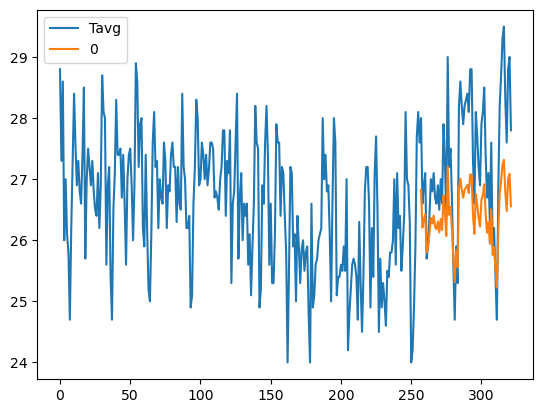

In [27]:
kan.plot()

In [28]:
new_data = [[354, 27.8],[355, 27.8],[356, 27.8],[357, 27.8],[358, 27.8],[359, 27.8],[360, 27.8]]
lr.predict(new_data)

C:\Users\rivan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26.46759474, 26.46483851, 26.46208228, 26.45932605, 26.45656983,
       26.4538136 , 26.45105737])

In [30]:
kan.to_json('Prediksi Maluku.json')